# Analyzing Global Suicide Rate from 1985 to 2016

##### Ziyu Wang

### Outline
* 1. Introduction
    * 1.1 Background Information
    * 1.2 Library Used
* 2. Data Collection
    * 2.1 About the Data
    * 2.2 Load and View 
* 3. Data Analysis & Visualization
* 4. Machine Learning Algorithm
    * 4.1Dataset Standardization
    * 4.2 Splitting Data
    * 4.3 Model Building & Training
        * 4.3.1 Linear Regression
        * 4.3.2 Decision Tree
* 5. Coclusion
 

### 1. Introduction 
In this project, I want to analysis the suicide rate in each country and their the relationship between suicide rate with gender, age, generation and GDP from year 1985 to 2016
#### 1.1 Background Infromation 
Suicide is the tenth leading cause of death in the United States (US), with nearly 100 suicides occurring each day and over 36,000 dying by suicide each year. Most of us can hardly imagine the suffering that precedes suicide and the pain left in its wake. It makes me wondering why people would desprate to end their life. Dose the society has some effect on suicide rate? Does the gdp of a country has effect on suicide rate. 

With all this questions being asked, I want to use detailed data to examine the relationship between suicide rate and the sex, ages and gdp of each country.Predicting the suicide rates using Machine Learning algorithms and analyzing them to find correlated factors causing increase in suicide rates globally. Hope after reading this project, the reader can have a better understanding of factors that affect suicide and why metal health is just as much import as physical health.

#### 1.2 Library Used
* Pandas: Used to display and organize in dataframes
* Numpy: Used to support our data
* Seaborn: Used to create plot
* Matplotlib: Used to format plots
* Scikit-learn: Used to create predictive model to group player into position groups

In [1]:
!pip install pycountry
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

## 2 About the data
the dataset I am using contains data from 101 countries, including the year, sex, age, times they attempt to commit suicides and the gdp for each year of each country from 1985-2016.The overview of this dataset is, it has 27820 samples with 12 features.

#### 2.1 Data Source
I got this data from kaggle, and this is the reference from kaggle page. https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016. 

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

#### 2.2 Data Load and view
The first step is to load data from the web. Since we need to use the column name a lot in the later data analyses, I want to  make the column names simpler. I download the data as a csv file. Loading in the dataset save it as a dataframe. Let's take a look of it.

In [2]:
df = pd.read_csv("master.csv")
df.rename(columns = {"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


 Also, for future conviniences, we should change the age 5-14 years to 05-14 format. 

In [3]:
df["age"] = df["age"].str.replace("5-14 years","05-14 years")
df.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Netherlands,NaN,female,35-54 years,NaN,NaN,NaN,Malta2014,NaN,"5,477,895,475",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


### 3. Data Analysis & Visualization
Now I want to process the data by some columns and compare it within the column. For example, to compare the suicide rate with sex, age, and generation. By using tools like lineplot and bar chart, we can understand how the data is distributed and the how features are related to each other.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


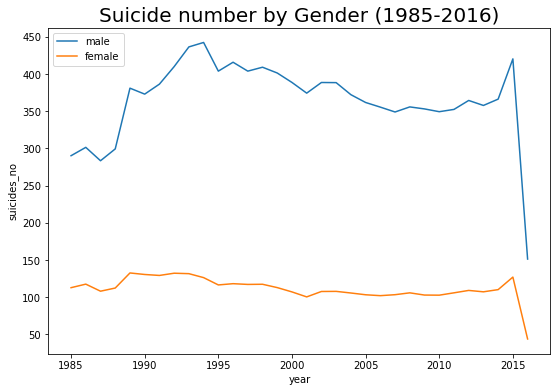

In [4]:
df_men = df[df.sex == 'male']
df_women = df[df.sex == 'female']
plt.figure(figsize=(9,6))
plt.title('Suicide number by Gender (1985-2016)', fontsize=20)
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

From the plot above, we can see throught 1985 to 2016, the suicide rate of male is always considerably higher than female. How about age?

<ipython-input-5-d9ecfd90e2ea>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = df.groupby(["year","age"])["suicides_no","population"].sum()
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


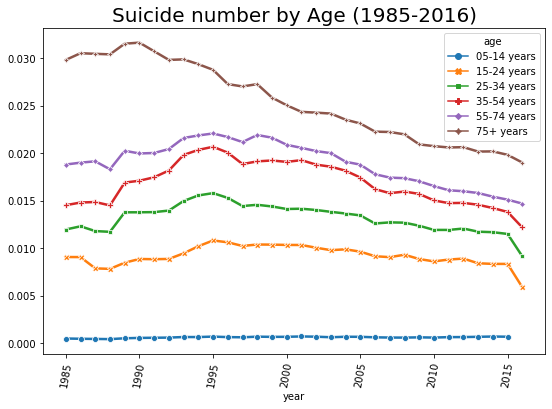

In [5]:
df_age = df.groupby(["year","age"])["suicides_no","population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
plt.title('Suicide number by Age (1985-2016)', fontsize=20)
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 80)
plt.show()


We can see the suicide rate is getting higher as the age is getting higher, so we know age is a factor of suicide.

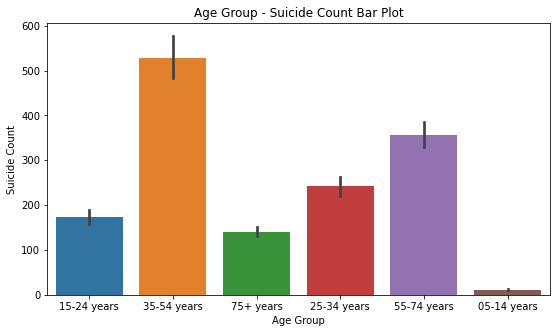

In [6]:
plt.figure(figsize=(9,5))
sns.barplot(x=df['age'], y=df['suicides_no'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

Even though age of  75+ years have the highest suicides rate, from the bar plot we can see that age of 35-54 years has the highest number followed by 55-74 years. One shocking part is we can see there still are cases in the 5-14 years although they are very less.

In [7]:
data_generation =  df.groupby('generation', as_index=False)['suicides_no'].sum().sort_values(by='suicides_no', ascending=False)
data_generation 

,generation,suicides_no
0,Boomers,2284498
5,Silent,1781744
2,Generation X,1532804
4,Millenials,623459
1,G.I. Generation,510009
3,Generation Z,15906


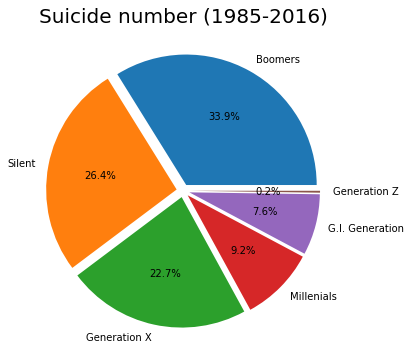

In [8]:
plt.figure(figsize=(6,6))
plt.title('Suicide number (1985-2016)', fontsize=20)
plt.pie(data_generation.suicides_no, explode =(0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=data_generation.generation, autopct='%1.1f%%')
plt.show()

From the pie chart, we can see that the Boomers generation has the highest suicide rate during this three decades. Slient and Generation X also have high percentage of 26.4% and 22.7%. 

Now, let's see the suicide rate among each country. From the above imformation, we know that there are 101 countries in the dataset. We want to list them and map them. First, we need to create a country list.

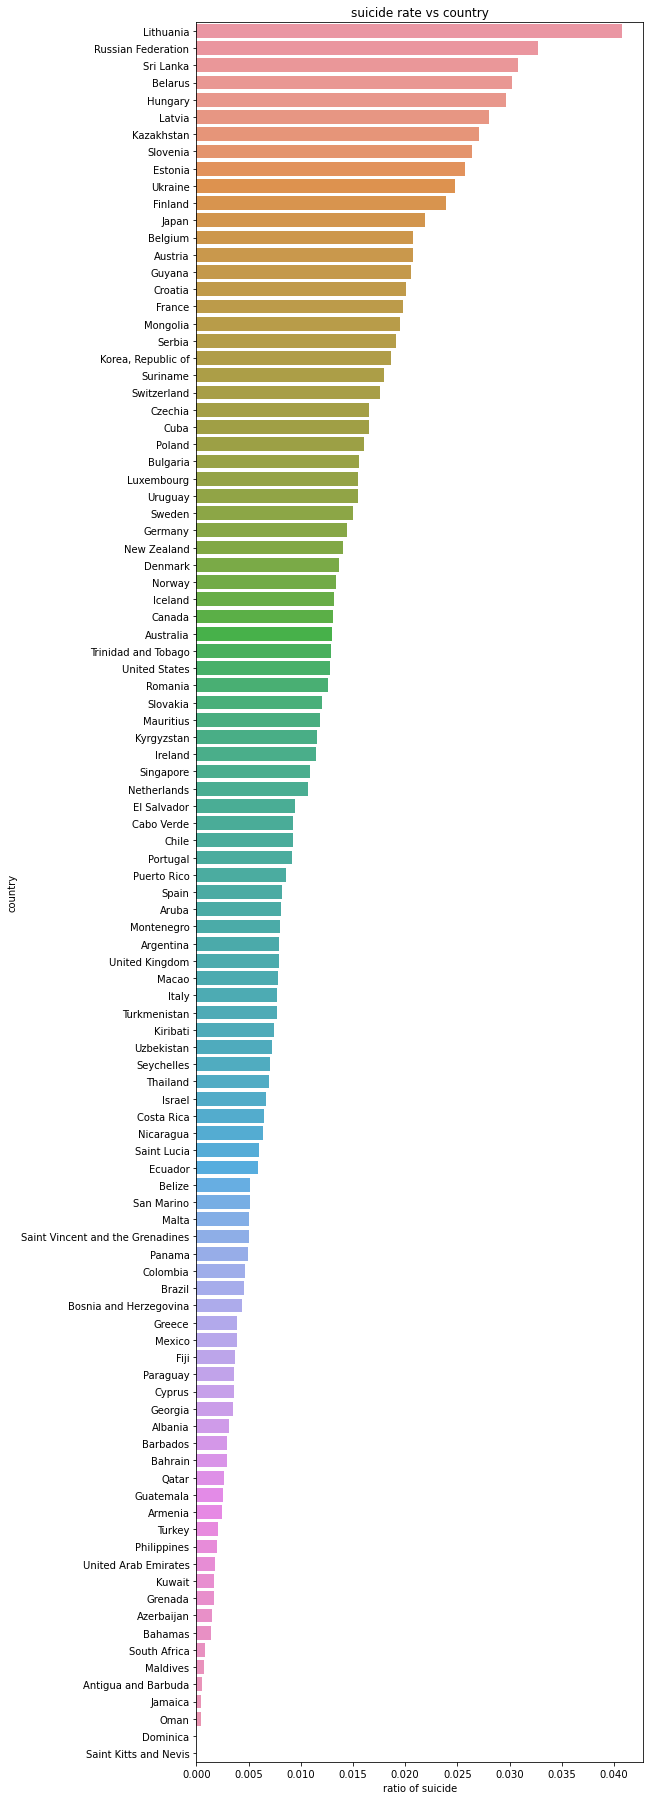

In [9]:
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list
#Corresponding the country names with respect to the code
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace('Czech Republic', "Czechia", inplace = True)
df.replace('Macau', 'Macao', inplace = True)
df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

#Before ploting the suicide rate of each countries,
#we calcuate the suicide rate for each year, and then take the average of number as rate.
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum

country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:])
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

From above plot we can see that Lithuania has the most suicide rate followed by Russian Federation and Sri Lanka.

Now let's take a look of the correlation of each column. Seaborn makes it easy to do the correlation. in the correlation matrix below, the higher the correlation coefficient between two variables. the deepper the color is. 

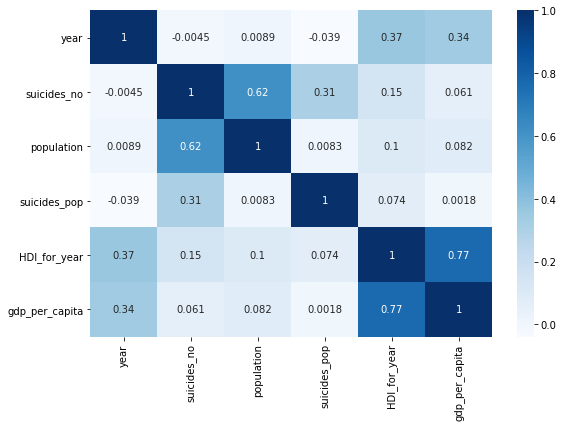

In [10]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

From the Correlation Heatmap, we see that the suicides number are obvisely related to the population. And the gdp per capita is highly related to the HDI for the year. What suprises me is that the suicides_number has less correlation with the gdp per capita. Before doing this correlation, I thought the suicide number would have a high correlation with gdp that hihger gdp would have less suicide number, turns out, that's not true. 

### 4. Machine Learning Algorithm
In the last section. we visualized the data to help a better understanding of how suicide related to the age,sex, country and the generation. We also correlated each column and had a better understanding how the attribure groups are correlated with each other. In this section, I want to build a machine learning model from these features-label pairs, which comprise our training set. My goal is to make accurate predictions for new, never-before-seen data.

#### 4.1 Dataset Standarlization

HDI for year has approximately 70% of the column are null values. This may tamper the model performance so, dropping the HDI for year column from the dataset. The county - year column seens just repeat data, so also drop it. Also, in the column gdp for year, drop the ','. Use LabelEncoder to convert non-numeric column to numerical label.

In [11]:
df = df.drop(['HDI_for_year'], axis = 1)
df = df.drop(['country-year'], axis = 1)
df.shape

(27820, 10)

In [12]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype(float)

In [13]:
#encoding the categorical features with LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

In [14]:
numerical = ['suicides_no', 'population', 'suicides_pop', 
              'gdp_for_year','gdp_per_capita']

rc = RobustScaler()
df[numerical] = rc.fit_transform(df[numerical])

#### 4.2 Splitting Data

In [15]:
# Sepratating & assigning features and target columns to X & y

y = df['suicides_pop']
X = df.drop('suicides_pop',axis=1)
X.shape, y.shape

((27820, 9), (27820,))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

#### 4.3 Model Building & Training
In this section, we finally start to buiding the ML model. I want to use Linear Regression and Decision Tree.

##### 4.3.1 Linear Regression
 Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [17]:
from sklearn.metrics import mean_squared_error
# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.356
Linear Regression: Accuracy on test Data: 0.362

Linear Regression: The RMSE of the training set is: 0.9631210108691918
Linear Regression: The RMSE of the testing set is: 0.9872040149556771


The accuracy on trainning Data and test Data are just 0.3. Therefore, the performance of this model is not very great. However, we observed that the score on the trainning set and test sets are very close. That means we are underfitting, not overfitting 

Now we can use Linear Regression to predict the suicide rate. note it's human behavior, so we can expect R square to less than 50%

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.3563802724646521

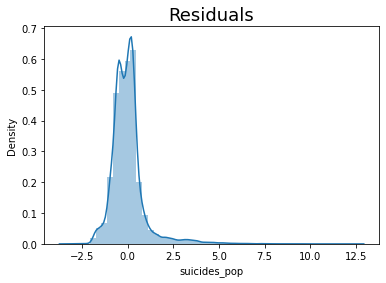

In [18]:
y_hat = lr.predict(X_train)
sns.distplot(y_train - y_hat)
plt.title("Residuals", size=18)
lr.score(X_train,y_train)

##### 4.3.2 Decision Tree : Regression 

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests. To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.


In [19]:
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.966
Decision Tree: Accuracy on test Data: 0.952

Decision Tree: The RMSE of the training set is: 0.21989455443994949
Decision Tree: The RMSE of the testing set is: 0.27214664660458954


This results is quite accurate! For Decision Tree, the accuacy for trainning Data is 0.966 and 0.952 for test Data. This is definitly more accurate than the Linear Regression. 

##### For more information about machine Learning, I found this amazing [website](https://machinelearningmastery.com/) that gives tutorial about Machine Learning skills and you can also download a free ebook about Machine Learnning here

### 5. Conclusion
#### 5.1 Tutorial recap
With this tutorial, we set out to analyze the suicide rate globaly with the relationship of gender, age, generation and countries. 
From data analysis and visualization part, we know that the suicide rate is related to the gender, ages, generation. Also, the suicide rate between different country has a huge differences. We can see that male population are more prone to commit suicide than female. Moreover, according to the suicide rate of different age group, the rate of elderly is higher. Is this mean that the world is not providing enough help for elder people? From the country list, we also observed that there are higher suicide number in Asia and Europe countries.
During the machine learning part, I used Linear Regression model and Decision tree model to predict the suicide rate. We know that for this data, use decision tree to predict is better than use Linear Regression. 

#### 5.2 Suicide Prevention
This is a tragic reaction to stressful life situations. Many people are suffuring from mental issues and would think there's no way out and end their own life is the only way to end the pain. But it is not solvable, it just take time and other people's understanding. With such a large number of people die from suicide, it's not just only problem of indivisuals but also a society's concern. Judging and misunderstanding can only make those who suffer from mental health to feel wrose. Learn suicide warning signs and how to reach out for immediate help and professional treatment. You may save a life — your own or someone else's. To prevent this, first is to get the treatment you neeed. Establish a suppport network is also important. And never forget that feeling and pain are temporary. 

# For immediate help
If you're feeling overwhelmed by thoughts of not wanting to live or you're having urges to attempt suicide, get help now.

Call 911 or your local emergency number immediately.
Call a suicide hotline. In the U.S., call the [National Suicide Prevention Lifeline](https://suicidepreventionlifeline.org/talk-to-someone-now/) at 1-800-273-8255 any time of day — press "1" to reach the [Veterans Crisis Line](https://www.veteranscrisisline.net/) or use [Lifeline Chat.](https://suicidepreventionlifeline.org/chat/)